In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("data/kaggle_predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
# Rename features
df = df.rename(columns={'Air temperature [K]':'Tair', 'Process temperature [K]':'Tprocess',
                       'Rotational speed [rpm]':'RPM', 'Torque [Nm]':'Torque',
                        'Tool wear [min]':'Wear', 'Target':'Failure'})
df.head()

,UDI,Product ID,Type,Tair,Tprocess,RPM,Torque,Wear,Failure,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

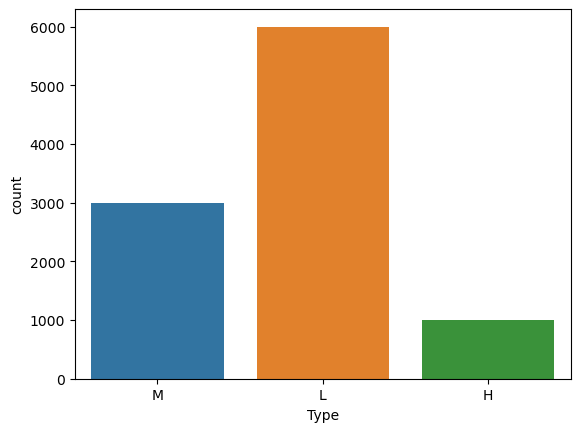

In [5]:
sns.countplot(data=df, x='Type')
plt.show()

In [6]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [7]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [8]:
df['Failure'].value_counts()

0    9661
1     339
Name: Failure, dtype: int64

In [9]:
df['Failure Type'].groupby(df['Failure']).value_counts()

Failure  Failure Type            
0        No Failure                  9643
         Random Failures               18
1        Heat Dissipation Failure     112
         Power Failure                 95
         Overstrain Failure            78
         Tool Wear Failure             45
         No Failure                     9
Name: Failure Type, dtype: int64

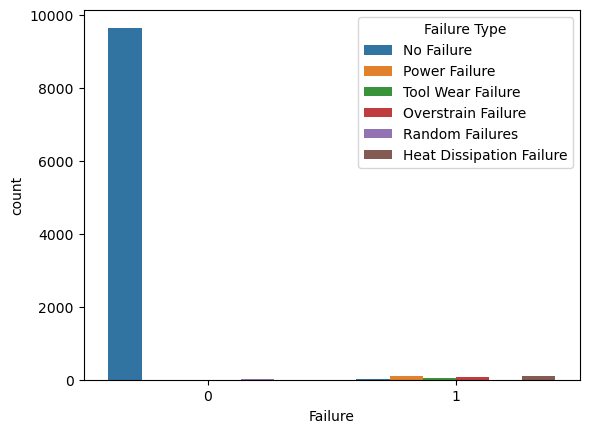

In [10]:
fig = plt.subplots()
ax = sns.countplot(x='Failure', hue='Failure Type', data=df)

## UCI Dataset

In [11]:
# load uci data
uci = pd.read_csv('data/ai4i2020_uci_pm_data.csv')
uci.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [12]:
uci['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [23]:
twf = sum(uci['TWF']==1)
hdf = sum(uci['HDF']==1)
pwf = sum(uci['PWF']==1)
osf = sum(uci['OSF']==1)
rnf = sum(uci['RNF']==1)
counts = {'TWF': twf, 'HDF': hdf, 'PWF': pwf, 'OSF': osf, 'RNF': rnf}
print(counts)
total = 0
for i in counts:
    total = total + counts[i]
print('Total:', total)

{'TWF': 46, 'HDF': 115, 'PWF': 95, 'OSF': 98, 'RNF': 19}
Total: 373


In [14]:
uci['Failure'] = uci['TWF'] + uci['HDF'] + uci['PWF'] + uci['OSF'] + uci['RNF']
uci['Failure'].unique()

array([0, 1, 2, 3], dtype=int64)

In [15]:
uci['Failure'].value_counts()

0    9652
1     324
2      23
3       1
Name: Failure, dtype: int64

In some cases, there are multiple modes of failure causing machine failure.

In [16]:
uci[uci['Failure']==3]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Failure
5909,5910,H35323,H,300.7,310.2,1364,65.3,208,1,1,0,1,1,0,3


In [17]:
uci[uci['Failure']==2]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0,2
1324,1325,M16184,M,298.8,310.1,1243,74.5,194,1,0,0,1,1,0,2
1496,1497,L48676,L,298.0,308.7,1268,69.4,189,1,0,0,1,1,0,2
3611,3612,L50791,L,301.7,310.9,1405,46.4,207,1,1,0,0,0,1,2
3854,3855,L51034,L,302.4,311.0,1338,67.6,194,1,0,0,1,1,0,2
3943,3944,L51123,L,302.3,311.4,1333,66.7,205,1,0,0,1,1,0,2
4254,4255,L51434,L,302.6,311.0,1284,68.0,114,1,0,1,1,0,0,2
4342,4343,M19202,M,301.7,309.8,1284,68.2,111,1,0,1,1,0,0,2
4370,4371,L51550,L,302.0,309.9,1308,57.6,197,1,0,1,0,1,0,2
4383,4384,L51563,L,301.7,309.5,1298,65.5,229,1,0,1,0,1,0,2


## Anomalies
1. No machine failure recorderd despite a cause to fail
2. Machine failure recorded without any cause to fail

#### 1. No Machine Failure Recorded Despite a Cause to Fail
These events should be marked as "failure", i.e., Machine failure = 1. 

In [37]:
anomaly_type1 = uci[(uci['Machine failure']==0) & (uci['Failure']>0)]
index1 = uci[(uci['Machine failure']==0) & (uci['Failure']>0)].index
print('Number of type 1 anomalies:', anomaly_type1.shape[0])
print('Indices:', index1.values)
anomaly_type1

Number of type 1 anomalies: 18
Indices: [1221 1302 1748 2072 2559 3065 3452 5471 5489 5495 5509 5553 5639 6091
 6913 6960 7488 7868]


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Failure
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,0,0,0,0,1,1
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1,1
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,0,0,0,0,1,1
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1,1
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1,1
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,0,0,0,0,1,1
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1,1
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,0,0,0,0,1,1
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,0,0,0,0,1,1
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,0,0,0,0,1,1


#### 2. Machine Failure Recorded Despite No Cause to Fail
These events should be marked as "no failure", i.e., Machine failure = 0.

In [38]:
anomaly_type2 = uci[(uci['Machine failure']>0) & (uci['Failure']==0)]
index2 = uci[(uci['Machine failure']>0) & (uci['Failure']==0)].index
print('Number of type 2 anomalies:', anomaly_type2.shape[0])
print('Indices:', index2.values)
anomaly_type2

Number of type 2 anomalies: 9
Indices: [1437 2749 4044 4684 5536 5941 6478 8506 9015]


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Failure
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,0,0,0,0,0,0
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,0,0,0,0,0,0
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,0,0,0,0,0,0
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0,0
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,0,0,0,0,0,0
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,0,0,0,0,0,0
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,0,0,0,0,0,0
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,0,0,0,0,0,0
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,0,0,0,0,0,0


#### Correct the anamolies

In [45]:
uci2 = uci.copy()
print('Value counts before and after correction')
print('Before\n', uci2['Machine failure'].value_counts())
uci2['Machine failure'].iloc[index1] = 1
uci2['Machine failure'].iloc[index2] = 0
print('After\n', uci2['Machine failure'].value_counts())

Value counts before and after correction
Before
 0    9661
1     339
Name: Machine failure, dtype: int64
After
 0    9652
1     348
Name: Machine failure, dtype: int64


C:\Users\DAD\AppData\Local\Temp\ipykernel_15784\4115391039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uci2['Machine failure'].iloc[index1] = 1
C:\Users\DAD\AppData\Local\Temp\ipykernel_15784\4115391039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uci2['Machine failure'].iloc[index2] = 0


In [49]:
# Double check for anomalies
anomaly_type1 = uci2[(uci2['Machine failure']==0) & (uci2['Failure']>0)]
print('Number of type 1 anomalies:', anomaly_type1.shape[0])

anomaly_type2 = uci2[(uci2['Machine failure']>0) & (uci2['Failure']==0)]
print('Number of type 2 anomalies:', anomaly_type2.shape[0])

Number of type 1 anomalies: 0
Number of type 2 anomalies: 0
